In [27]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima, ARIMA, model_selection
import numpy as np
from sklearn.model_selection import ParameterGrid

In [55]:
df = pd.read_csv(r'C:\Users\siddharth\Desktop\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Time Series Analysis\ARIMA, SARIMA and SARIMAX\daily_revenue.csv')
df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y")

In [56]:
df.set_index('date', inplace=True)

In [57]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='date', length=1795, freq=None)

In [58]:
df['revenue'] = df['revenue'].str.replace(",","").astype(float)

In [59]:
df['discount_rate'] = df['discount_rate'].str.replace("%",'').astype(float)
df['coupon_rate'] = df['coupon_rate'].str.replace("%",'').astype(float)

In [60]:
df = df.rename(columns={'revenue':'y'})

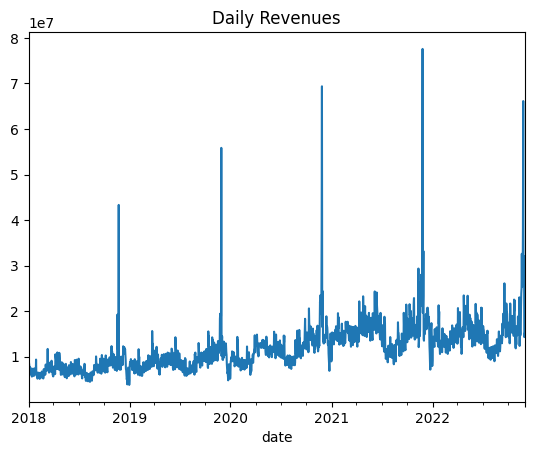

In [61]:
# Daily revenues line plot
df['y'].plot(title = 'Daily Revenues')
plt.show()

C:\Users\siddharth\AppData\Local\Temp\ipykernel_12880\2481325335.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['y'].resample('M').mean(),


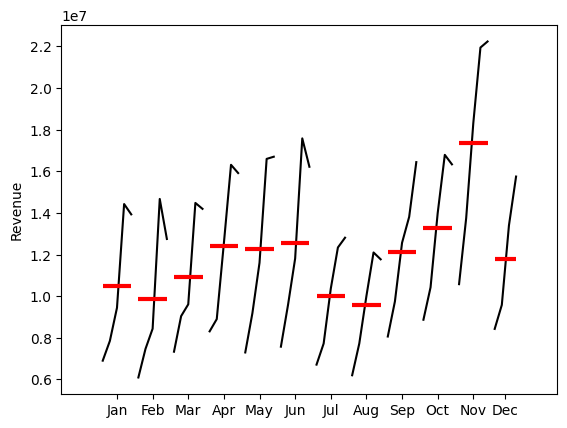

In [62]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of revenue values
month_plot(df['y'].resample('M').mean(),
           ylabel = 'Revenue')
plt.show()

C:\Users\siddharth\AppData\Local\Temp\ipykernel_12880\3193710253.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['y'].resample('Q').mean(),


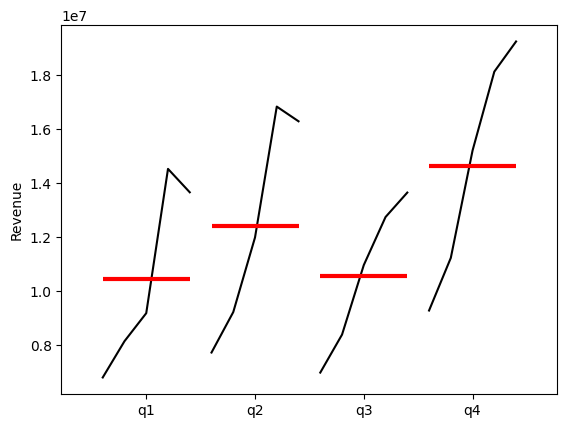

In [63]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of revenue values
# .resample('Q') - to convert the time series data into quarterly seasonality
quarter_plot(df['y'].resample('Q').mean(),
           ylabel = 'Revenue')
plt.show()

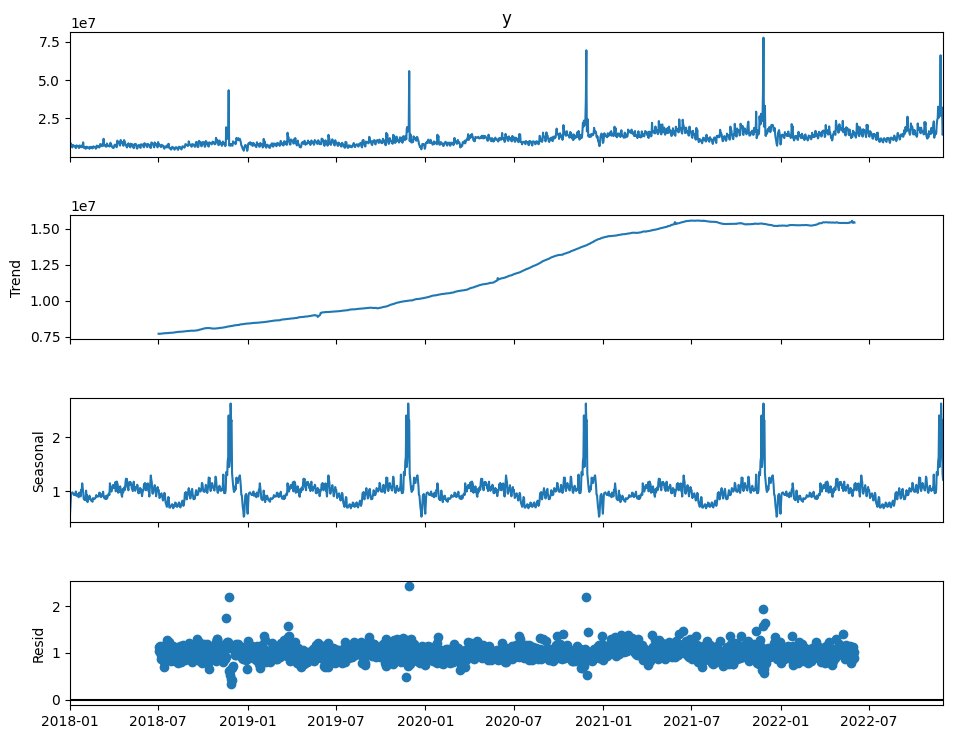

In [64]:
# Seasonal Decomposition Plots for Revenue Data
# Multiplicative model type, with daily seasonality (365 days)
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

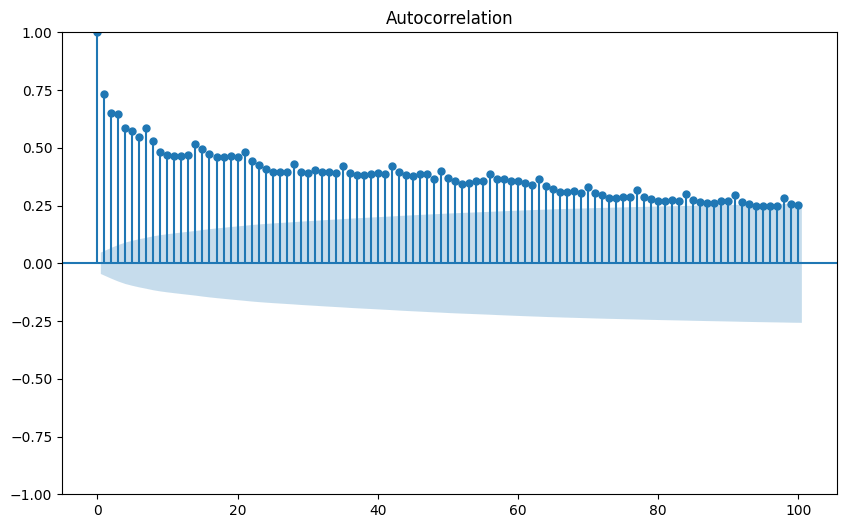

In [65]:
# Plot the autocorrelation (ACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

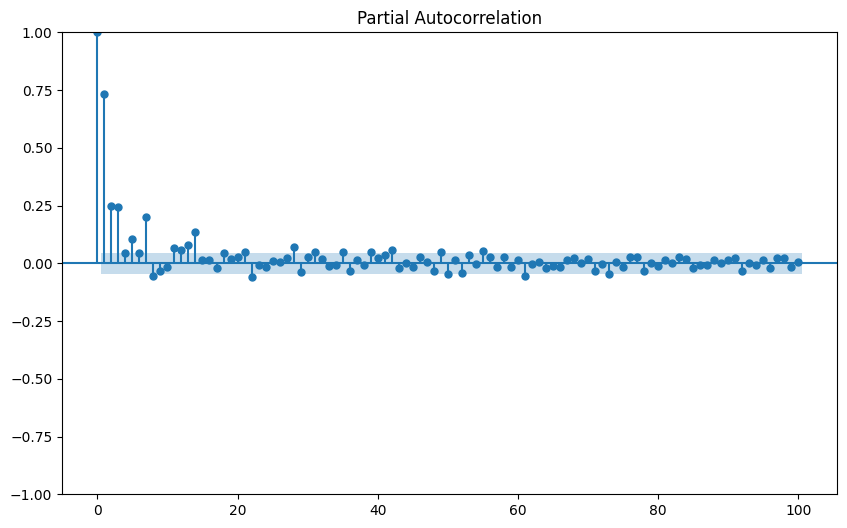

In [66]:
# Plot the partial autocorrelation (PACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 100, ax = ax)
plt.show()

In [67]:
from statsmodels.tsa.stattools import adfuller

In [71]:
result = adfuller(df['y']) 
print(result[1])

if result[1] < 0.05: 
    print('Evidence suggests that the time series is stationary') 
else: 
    print('Evidence suggests that the time series is not stationary')

0.10190360862386139
Evidence suggests that the time series is not stationary


In [72]:
df['y_diff'] = df['y'].diff().dropna() 
df['y_diff']

date
2018-01-01           NaN
2018-01-02     2651237.0
2018-01-03     -475975.0
2018-01-04     -660303.0
2018-01-05    -1410495.0
                 ...    
2022-11-26   -39180777.0
2022-11-27     4955921.0
2022-11-28      210050.0
2022-11-29   -17786305.0
2022-11-30      712049.0
Name: y_diff, Length: 1795, dtype: float64

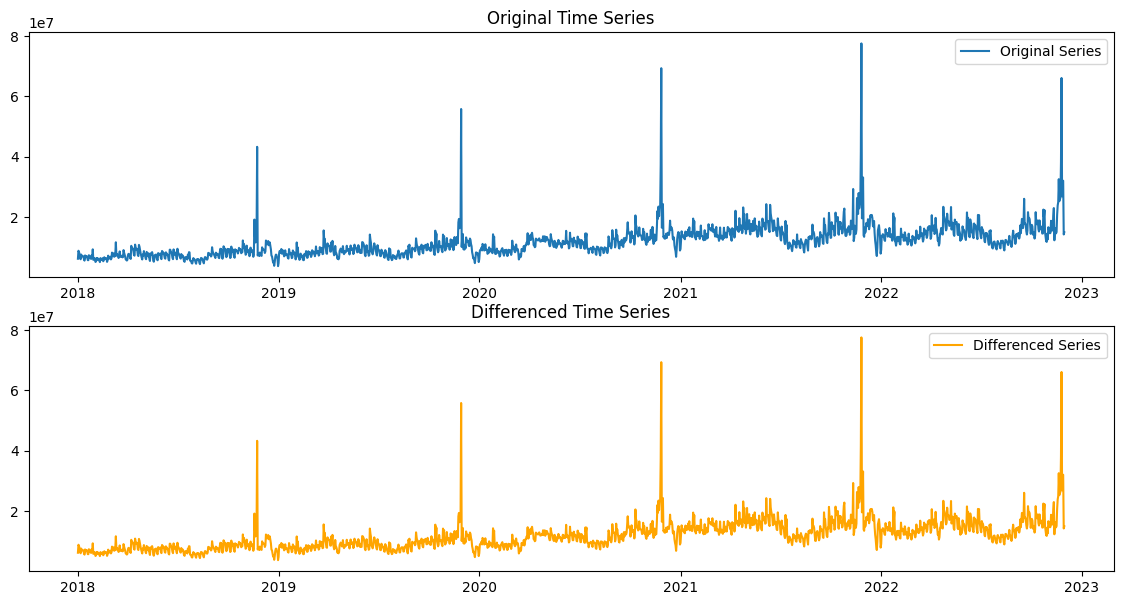

In [76]:
plt .figure(figsize=(14,7))
plt.subplot(2,1,1) 
plt.plot(df['y'], label = 'Original Series') 
plt.title('Original Time Series') 
plt.legend()


plt.subplot(2,1,2) 
plt.plot(df['y'], label = 'Differenced Series', color = 'orange') 
plt.title('Differenced Time Series') 
plt.legend()

In [78]:
result = adfuller(df['y_diff'].dropna()) 
print(result[1])

if result[1] < 0.05: 
    print('Evidence suggests that the time series is stationary') 
else: 
    print('Evidence suggests that the time series is not stationary')

6.513792026815736e-24
Evidence suggests that the time series is stationary


In [79]:
test_days = 30 # number of days to reserve for testing 

train, test = df.iloc[:-test_days], df.iloc[-test_days:] 

In [80]:
model = auto_arima(train['y'], seasonal=False)
model.summary()

c:\Work\MLOps\flask_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Work\MLOps\flask_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Work\MLOps\flask_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Work\MLOps\flask_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Work\MLOps\flask_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Work\MLOps\f

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1765
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -28817.267
Date:                Tue, 10 Jun 2025   AIC                          57650.535
Time:                        21:55:05   BIC                          57694.337
Sample:                    01-01-2018   HQIC                         57666.720
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4136      0.120     -3.449      0.001      -0.649      -0.179
ar.L2          0.3017      0.053      5.671      0.000       0.197       0.406
ar.L3          0.1570      0.028      5.705      0.000       0.103       0.211
ar.L4          0.0679      0.029      2.365      0.018       0.012       0.124
ar.L5          0.0466      0.024      1.937      0.053      -0.001       0.094
ma.L1         -0.1598      0.118     -1.354      0.176      -0.391       0.071
ma.L2         -0.7423      0.108     -6.872      0.000      -0.954      -0.531
sigma2      9.084e+12   1.86e-14   4.88e+26      0.000    9.08e+12    9.08e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            580903.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                             5.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.26e+42. Standard errors may be unstable.
"""

In [81]:
predictions_arima = model.predict(n_periods=len(test)) 
predictions_arima

c:\Work\MLOps\flask_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2022-11-01    1.445299e+07
2022-11-02    1.474103e+07
2022-11-03    1.503283e+07
2022-11-04    1.527520e+07
2022-11-05    1.534078e+07
2022-11-06    1.553442e+07
2022-11-07    1.554542e+07
2022-11-08    1.563967e+07
2022-11-09    1.565016e+07
2022-11-10    1.569221e+07
2022-11-11    1.570256e+07
2022-11-12    1.571953e+07
2022-11-13    1.572734e+07
2022-11-14    1.573420e+07
2022-11-15    1.573904e+07
2022-11-16    1.574197e+07
2022-11-17    1.574462e+07
2022-11-18    1.574600e+07
2022-11-19    1.574734e+07
2022-11-20    1.574804e+07
2022-11-21    1.574869e+07
2022-11-22    1.574906e+07
2022-11-23    1.574937e+07
2022-11-24    1.574956e+07
2022-11-25    1.574971e+07
2022-11-26    1.574981e+07
2022-11-27    1.574988e+07
2022-11-28    1.574994e+07
2022-11-29    1.574997e+07
2022-11-30    1.575000e+07
Freq: D, dtype: float64

In [82]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

In [83]:
# Function to plot the future
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train and forecast data
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

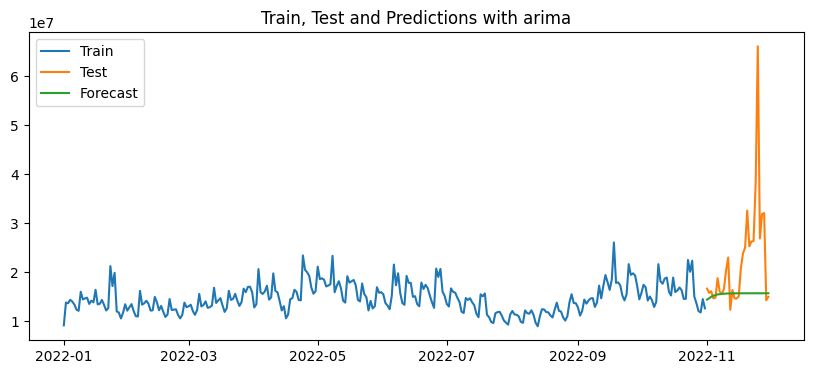

The MAE is 7267306.03
The RMSE is 12366038.30
The MAPE is 24.15 %


In [84]:
model_assessment(train['y']['2022':], test['y'], predictions_arima, 'arima')

In [85]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.deprecation")

In [86]:
model_sarima = auto_arima(train['y'], m = 7) 
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28762.051
Date:                           Tue, 10 Jun 2025   AIC                          57546.103
Time:                                   21:58:27   BIC                          57606.331
Sample:                               01-01-2018   HQIC                         57568.358
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   4682.776      2.150      0.032     890.247    1.92e+04
ar.L1         -0.3476      0.072     -4.797      0.000      -0.490      -0.206
ar.L2          0.1856      0.032      5.722      0.000       0.122       0.249
ar.L3          0.1034      0.016      6.523      0.000       0.072       0.135
ma.L1         -0.1958      0.074     -2.656      0.008      -0.340      -0.051
ma.L2         -0.5684      0.060     -9.401      0.000      -0.687      -0.450
ar.S.L7        0.0805      0.181      0.445      0.656      -0.274       0.435
ar.S.L14       0.8713      0.172      5.071      0.000       0.534       1.208
ma.S.L7       -0.0035      0.176     -0.020      0.984      -0.349       0.342
ma.S.L14      -0.8322      0.157     -5.310      0.000      -1.139      -0.525
sigma2      9.294e+12      0.000   8.85e+16      0.000    9.29e+12    9.29e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            848652.02
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                             5.24
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+31. Standard errors may be unstable.
"""

In [87]:
predictions_sarima = model_sarima.predict(n_periods=len(test)) 
predictions_sarima


2022-11-01    1.513411e+07
2022-11-02    1.504534e+07
2022-11-03    1.464458e+07
2022-11-04    1.382188e+07
2022-11-05    1.398002e+07
2022-11-06    1.697854e+07
2022-11-07    1.583307e+07
2022-11-08    1.605210e+07
2022-11-09    1.575797e+07
2022-11-10    1.523585e+07
2022-11-11    1.428027e+07
2022-11-12    1.448986e+07
2022-11-13    1.761290e+07
2022-11-14    1.658423e+07
2022-11-15    1.682759e+07
2022-11-16    1.635487e+07
2022-11-17    1.582120e+07
2022-11-18    1.482105e+07
2022-11-19    1.499263e+07
2022-11-20    1.780768e+07
2022-11-21    1.673571e+07
2022-11-22    1.694581e+07
2022-11-23    1.665825e+07
2022-11-24    1.616895e+07
2022-11-25    1.526419e+07
2022-11-26    1.547008e+07
2022-11-27    1.842690e+07
2022-11-28    1.745384e+07
2022-11-29    1.769224e+07
2022-11-30    1.726672e+07
Freq: D, dtype: float64

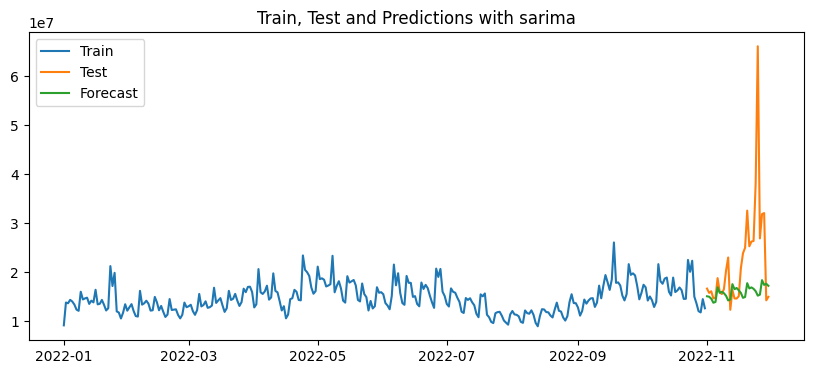

The MAE is 7210544.75
The RMSE is 12152387.53
The MAPE is 24.54 %


In [88]:
model_assessment(train['y']['2022':], test['y'], predictions_sarima, 'sarima')

In [90]:
exog_train, exog_test = df.iloc[:-test_days,1:3], df.iloc[-test_days:, 1:3]

In [93]:
model_sarimax = auto_arima(train['y'], m = 7, X = exog_train, n_jobs = -1)
model_sarimax.summary()

c:\Work\MLOps\flask_env\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28613.022
Date:                           Tue, 10 Jun 2025   AIC                          57250.045
Time:                                   22:05:08   BIC                          57315.749
Sample:                               01-01-2018   HQIC                         57274.324
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1.641e+04   7882.122      2.082      0.037     962.045    3.19e+04
discount_rate   4.03e+05   2.35e+04     17.135      0.000    3.57e+05    4.49e+05
coupon_rate    9.229e+05   6.11e+04     15.100      0.000    8.03e+05    1.04e+06
ar.L1            -0.6526      0.156     -4.196      0.000      -0.957      -0.348
ar.L2             0.1828      0.049      3.765      0.000       0.088       0.278
ma.L1             0.1066      0.155      0.689      0.491      -0.197       0.410
ma.L2            -0.6923      0.124     -5.565      0.000      -0.936      -0.448
ar.S.L7           0.0523      0.187      0.280      0.780      -0.314       0.419
ar.S.L14          0.8999      0.178      5.064      0.000       0.552       1.248
ma.S.L7           0.0182      0.183      0.100      0.921      -0.340       0.376
ma.S.L14         -0.8500      0.161     -5.289      0.000      -1.165      -0.535
sigma2         7.655e+12      0.016   4.75e+14      0.000    7.65e+12    7.65e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           1075173.35
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             5.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+29. Standard errors may be unstable.
"""

In [94]:
predictions_sarimax = model_sarimax.predict(n_periods = len(test), X = exog_test) 
predictions_sarimax

2022-11-01    1.675214e+07
2022-11-02    1.494551e+07
2022-11-03    1.488423e+07
2022-11-04    1.296411e+07
2022-11-05    1.205461e+07
2022-11-06    1.394966e+07
2022-11-07    1.341712e+07
2022-11-08    1.328240e+07
2022-11-09    1.441164e+07
2022-11-10    2.077578e+07
2022-11-11    2.121842e+07
2022-11-12    1.346320e+07
2022-11-13    1.489109e+07
2022-11-14    1.299920e+07
2022-11-15    1.348073e+07
2022-11-16    1.398034e+07
2022-11-17    1.803894e+07
2022-11-18    1.675104e+07
2022-11-19    1.712312e+07
2022-11-20    1.980774e+07
2022-11-21    1.847887e+07
2022-11-22    1.908216e+07
2022-11-23    1.913615e+07
2022-11-24    2.068900e+07
2022-11-25    1.926286e+07
2022-11-26    1.851267e+07
2022-11-27    2.073231e+07
2022-11-28    2.607974e+07
2022-11-29    1.588267e+07
2022-11-30    1.479936e+07
Freq: D, dtype: float64

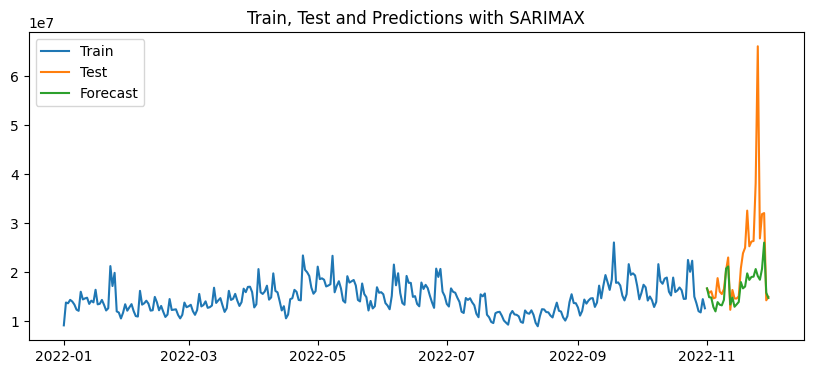

The MAE is 5716605.43
The RMSE is 10394634.76
The MAPE is 19.36 %


In [95]:
# Model assessment
model_assessment(train['y']['2022':], test['y'], predictions_sarimax, "SARIMAX")

In [97]:
model_cv = ARIMA(order=(2, 1, 2), seasonal_order=(2, 0, 2, 7))

cv = model_selection.RollingForecastCV(
    initial = df.shape[0] - 180, 
    h = 30, 
    step = 15
)

In [98]:
# perform cross validation scoring using specified inputs 

cv_score = model_selection.cross_val_score(model_cv, 
                                           y = df['y'], 
                                           X = df.iloc[:,1:3], 
                                           scoring = "mean_squared_error", 
                                           cv = cv, 
                                           verbose=1
                                           
                                           )

In [ ]:
# rmse cross validation

rmse = np.sqrt(np.mean(cv_score))

print(rmse)

4405858.195259986


In [103]:
param_grid = {
    'p':[1], 
    'd':[0,1], 
    'q': [1,2], 
    'P': [1,2], 
    'D': [0], 
    'Q': [1]
}

grid = list(ParameterGrid(param_grid))[:5]

len(list(grid))

5

In [104]:
from tqdm.auto import tqdm 

In [105]:
rmse_list = []

for params in tqdm(grid):

    model = ARIMA(
        order=(params["p"], params["d"], params["q"]),
        seasonal_order=(params["P"], params["D"], params["Q"], 7),
    )

    cv = model_selection.RollingForecastCV(
        h = 30, 
        step=15, 
        initial=df.shape[0] - 180 
    )

    cv_score = model_selection.cross_val_score(
        model, 
        y = df['y'], 
        X = df.iloc[:,1:3], 
        scoring='mean_squared_error', 
        cv = cv, 
        verbose=1, 
    )

    rmse = np.sqrt(np.mean(cv_score)) 
    rmse_list.append(rmse)

  0%|          | 0/5 [00:00<?, ?it/s]

c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

In [106]:
tuning_results = pd.DataFrame(grid) 

tuning_results['rmse'] = rmse_list 

In [113]:
best_params = tuning_results.iloc[tuning_results['rmse'].idxmax()].astype(int).to_dict()

In [ ]:
p, d, q, P, D, Q = (
    best_params["p"],
    best_params["d"],
    best_params["q"],
    best_params["P"],
    best_params["D"],
    best_params["Q"],
)

In [115]:
df_future = pd.read_csv(r'C:\Users\siddharth\Desktop\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Time Series Analysis\ARIMA, SARIMA and SARIMAX\future_regressors.csv')
df_future['date'] = pd.to_datetime(df_future['date'], format = "%d/%m/%Y")
df_future.set_index('date', inplace=True)

In [116]:
X_future = df_future.iloc[:,1:3] * 100 

In [118]:
tuned_model = ARIMA(
    order=(p,d,q), 
    seasonal_order=(P,D,Q,7)
)

tuned_model.fit(df['y'], X = df.iloc[:,1:3])

c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Work\MLOps\flask_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(order=(1, 1, 2), seasonal_order=(1, 0, 1, 7))

In [119]:
predictions = tuned_model.predict(n_periods=len(X_future), X = X_future)

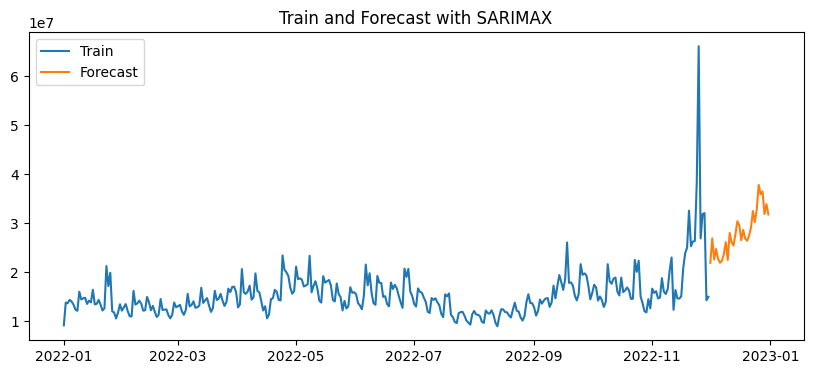

In [121]:
# Data Visualization
plot_future(df['y']['2022':], predictions, "SARIMAX")